# Modelo de Kermack McKendrick

hola

In [1]:
include("Taylor.jl")
using ADT

In [127]:
function coefs_1(F1, F2, S0, I0, R0 = 0.0, n = 20)
    s = [S0]
    i = [I0]
    r = [R0]
    
    for k = 1:n-1
        
        Ts = Taylor(s)
        Ti = Taylor(i)
        Tr = Taylor(r)
        
        fs = F1(Ts,Ti) # F1 = -b*S*I
        fr = F2(Ti) # F2 = g*I
        
        fi = -fs -fr # = b*S*I - g*I
        
        S0 = fs.pol[k]/k
        I0 = fi.pol[k]/k
        R0 = fr.pol[k]/k
        
        push!(s,S0)
        push!(r,R0)
        push!(i,I0)
    end
    s = Taylor(s)
    i = Taylor(i)
    r = Taylor(r)
    return s,i,r
        
end

coefs_1 (generic function with 4 methods)

Prueba

In [200]:
N = 1000.;
I0 = 1.;
S0 = N-I0;

@time S,I,R = coefs_1(F1, F2, S0, I0);

  0.001286 seconds (20.70 k allocations: 385.672 KB)


Error absoluto

In [138]:
eps_abs = 1e-50

1.0e-50

In [139]:
function paso(a::Taylor, p = 20)
    
    while p != 0 && a.pol[p] == 0
       p = p-1;
    end
    
    h = 0.5*(eps_abs/abs(a.pol[p]))^(1/p)
end

paso (generic function with 2 methods)

In [145]:
function ev_horner{T<:Number}(a::Taylor,t0::T)
    
    n = gradomax(a)
    x1 = a.pol[n]
    
    for k = 1:n-1
        x1 = a.pol[n-k] + x1*t0
    end
    return x1
end

ev_horner (generic function with 1 method)

In [151]:
function integrador_kermack(N, I0, t0, tf, F1, F2)
    R0 = 0.
    S0 = N - I0 - R0
    
    t = [t0]
    s = [S0]
    i = [I0]
    r = [R0]
    
    while t0 < tf
        S,I,R = coefs_1(F1, F2, S0, I0)
        
        h_s = paso(S)
        h_i = paso(I)
        h_r = paso(R)
        h = min(h_s, h_i, h_r)
        
        t0 += h
        
        S0 = ev_horner(S,h)
        I0 = ev_horner(I,h)
        R0 = ev_horner(R,h)
        
        push!(t,t0)
        push!(s,S0)
        push!(i,I0)
        push!(r,R0)
    end
    return t,s,i,r
end

integrador_kermack (generic function with 1 method)

In [227]:
beta = 0.2
gamma = 0.1

F1(x,y) = -beta*x*y
F2(x) = gamma*x

F2 (generic function with 1 method)

In [228]:
N = 1.;

t,s,i,r = integrador_kermack(N,.01,0.,160.,F1,F2)

([0.0,0.0654938,0.13084,0.196041,0.261101,0.326023,0.390811,0.455467,0.519993,0.584394  …  158.386,158.571,158.756,158.941,159.126,159.311,159.497,159.682,159.868,160.054],[0.99,0.98987,0.989739,0.989608,0.989476,0.989344,0.989212,0.989078,0.988944,0.98881  …  0.200095,0.200092,0.200089,0.200085,0.200082,0.200079,0.200076,0.200073,0.20007,0.200067],[0.01,0.0100644,0.010129,0.0101939,0.010259,0.0103244,0.0103901,0.010456,0.0105222,0.0105887  …  0.000448911,0.000443957,0.000439055,0.000434206,0.000429408,0.00042466,0.000419963,0.000415316,0.000410718,0.000406168],[0.0,6.57044e-5,6.59774e-5,6.62538e-5,6.65334e-5,6.68162e-5,6.7102e-5,6.73909e-5,6.76827e-5,6.79774e-5  …  8.34871e-6,8.25972e-6,8.1718e-6,8.08493e-6,7.99908e-6,7.91423e-6,7.83038e-6,7.74749e-6,7.66555e-6,7.58454e-6])

In [229]:
length(t)

2138

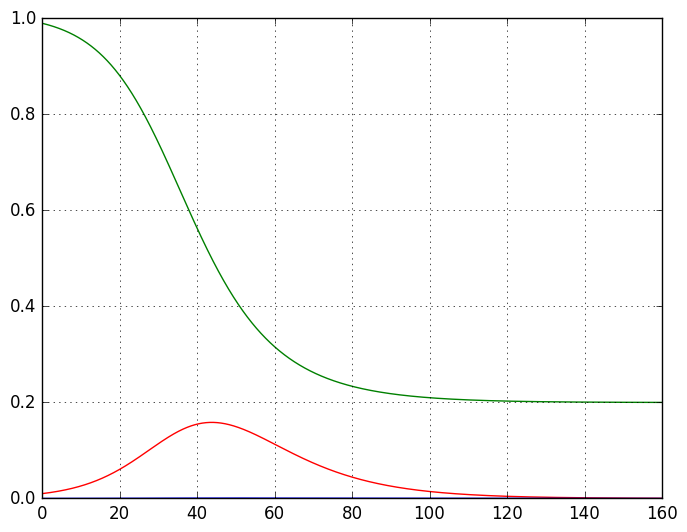

In [233]:
using PyPlot

plot(t,s, color = "green")
plot(t,i, color = "red")
plot(t,r)
axis([0,160,0,1])
grid()

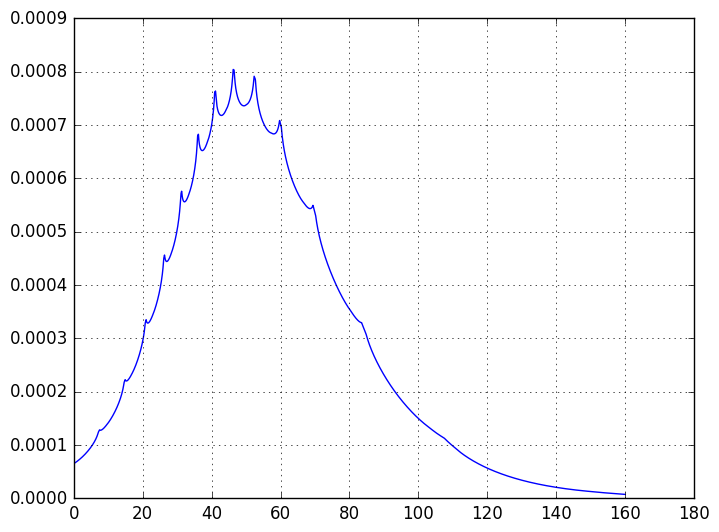

In [253]:
plot(t,r)
grid()

In [254]:
function wtf()
    return "WTF"
end

wtf (generic function with 1 method)

In [257]:
mi_reaccion_ante_la_grafica_de_r = wtf()

"WTF"